In [1]:
%matplotlib inline  
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
from collections import Counter
import math
from collections import Counter
import numpy as np
from scipy.special import comb
import itertools as it
# MANUEL: This doesn't work for me
#%load_ext line_profiler
from imp import reload
import itertools as it
import pandas as pd
import seaborn as sns
import sys
#sys.path.insert(0, '../mallows kendall')
import mallows_kendall as mk
import cego_lop
import cego
import lop
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


# running experiments
How to run one experiment with a particular parameter configuration

In [30]:
reload(cego_lop)
reload(cego)
reload(lop)
reload(mk)
n = 20
m_max = 50
rep = 0
instance_name = "instances/LOPsynt_7.pkl"
budgetGA = 3
budgetMM = 10
m_ini=11
ratio_samples_learn,weight_mass_learn = 0.1,0.9
cego_lop.run_and_save(n,rep,instance_name, budgetGA,budgetMM,
                      ratio_samples_learn=ratio_samples_learn,
                      weight_mass_learn=weight_mass_learn,
                      m_max=m_max, m_ini=m_ini)

instances/LOPsynt_7.pkl
[1] "Evaluations: 12     Quality: 87.265"
[1] "Evaluations: 13     Quality: 87.265"
[1] "Evaluations: 14     Quality: 87.265"
[1] "Evaluations: 15     Quality: 87.095"
[1] "Evaluations: 16     Quality: 87.095"
[1] "Evaluations: 17     Quality: 87.095"
[1] "Evaluations: 18     Quality: 78.675"
[1] "Evaluations: 19     Quality: 78.675"
[1] "Evaluations: 20     Quality: 78.675"
[1] "Evaluations: 21     Quality: 78.675"
[1] "Evaluations: 22     Quality: 78.675"
[1] "Evaluations: 23     Quality: 78.675"
[1] "Evaluations: 24     Quality: 78.675"
[1] "Evaluations: 25     Quality: 78.675"
[1] "Evaluations: 26     Quality: 78.675"
[1] "Evaluations: 27     Quality: 78.675"
[1] "Evaluations: 28     Quality: 78.675"
[1] "Evaluations: 29     Quality: 78.675"
[1] "Evaluations: 30     Quality: 78.675"
[1] "Evaluations: 31     Quality: 78.675"
[1] "Evaluations: 32     Quality: 78.675"
[1] "Evaluations: 33     Quality: 78.675"
[1] "Evaluations: 34     Quality: 78.675"
[1] "Evalu

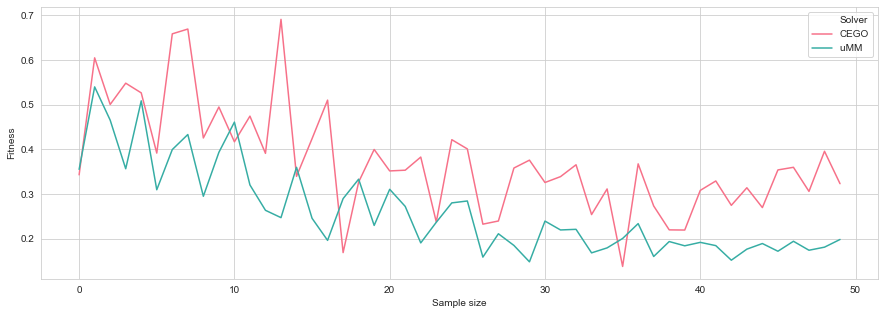

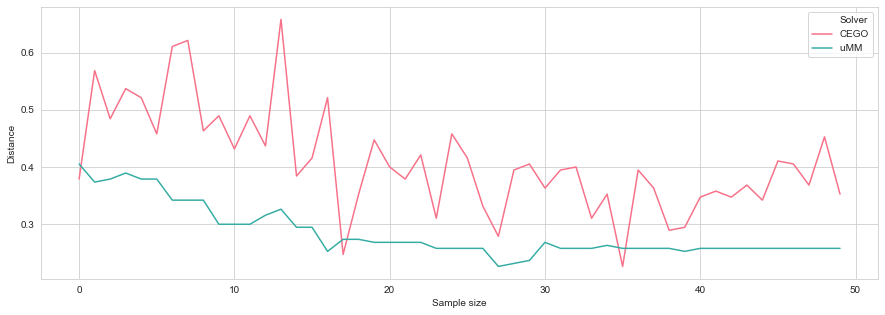

In [31]:
sns.set_style("whitegrid")
df = pd.read_pickle('pickles/pickLocal.pkl')#pick570618.pkl
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=df, palette=palette)
    plt.show()

# Plot the results 

In [33]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
df.head()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Distance,Fitness,Problem,Sample size,Solver,best_known,budget,budgetGA,budgetMM,m_ini,...,n,phi_estim,phi_instance,phi_sample,ratio_samples_learn,rep,rho,run_time,weight_mass_learn,worst_known
0,0.284211,0.412472,LOP,0.0,uMM,17.225,16.0,1000,16.0,38.0,...,20,0.840140,0.5,0.789062,0.2307,3.0,0.000107,384.540863,0.8825,172.775
1,0.284211,0.347284,LOP,1.0,uMM,17.225,16.0,1000,16.0,38.0,...,20,0.832932,0.5,0.785156,0.2307,3.0,0.000050,384.540863,0.8825,172.775
2,0.305263,0.494439,LOP,2.0,uMM,17.225,16.0,1000,16.0,38.0,...,20,0.848013,0.5,0.785156,0.2307,3.0,0.000130,384.540863,0.8825,172.775
3,0.310526,0.326776,LOP,3.0,uMM,17.225,16.0,1000,16.0,38.0,...,20,0.845007,0.5,0.785156,0.2307,3.0,0.000114,384.540863,0.8825,172.775
4,0.294737,0.413693,LOP,4.0,uMM,17.225,16.0,1000,16.0,38.0,...,20,0.824562,0.5,0.781250,0.2307,3.0,0.000092,384.540863,0.8825,172.775


### Cuántas repeticiones hay de cada experimento?

In [37]:
a = df[(df.n==20) & (df.budgetGA==1000)&(df['Sample size']==0)].groupby(['Solver', 'm_max', 'n', 'phi_instance','weight_mass_learn' ,'ratio_samples_learn','m_ini','budgetMM']).count()['Distance']#.reset_index().values[:,-1]
a

Solver  m_max  n   phi_instance  weight_mass_learn  ratio_samples_learn  m_ini  budgetMM
uMM     400    20  0.5           0.8295             0.2224               32.0   14.0        10
                                 0.8297             0.1698               32.0   17.0        10
                                 0.8362             0.1503               23.0   15.0        10
                                 0.8825             0.2307               38.0   16.0        10
                   0.7           0.8295             0.2224               32.0   14.0        10
                                 0.8297             0.1698               32.0   17.0        10
                                 0.8362             0.1503               23.0   15.0        10
                                 0.8825             0.2307               38.0   16.0        10
                   0.9           0.8295             0.2224               32.0   14.0        10
                                 0.8297             0.16

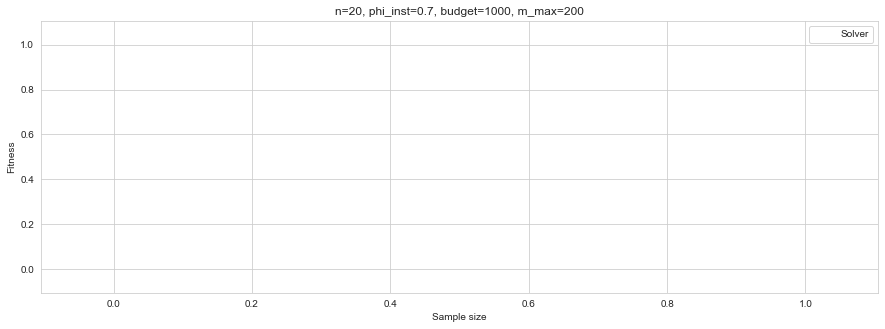

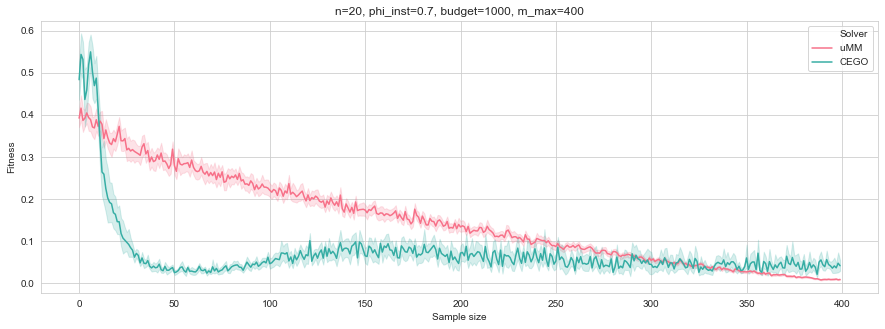

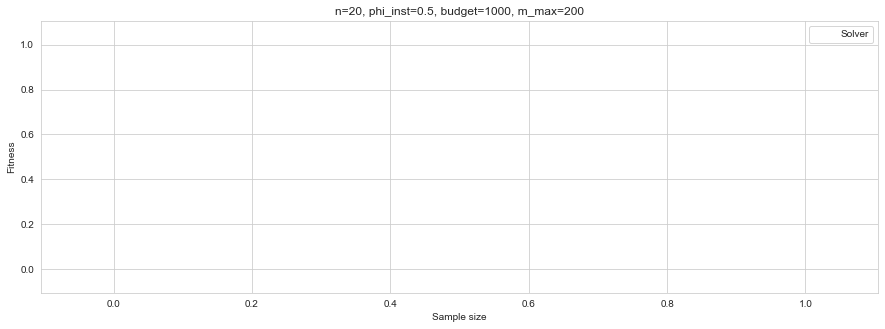

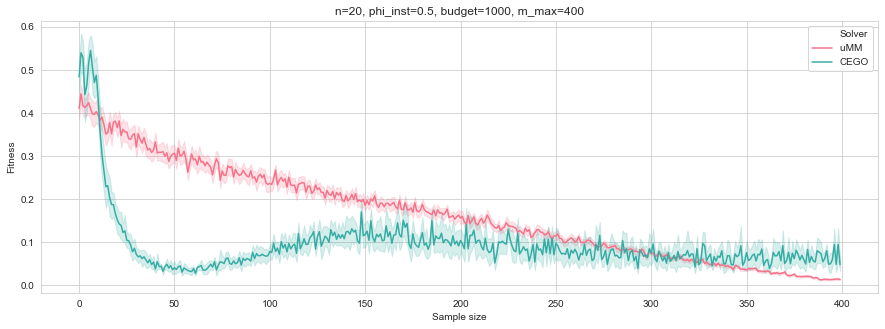

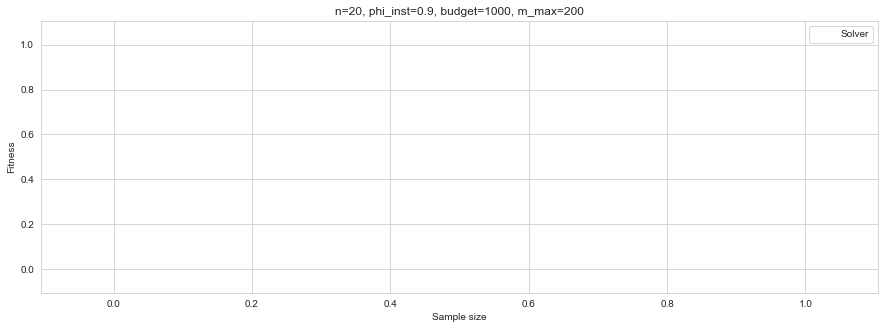

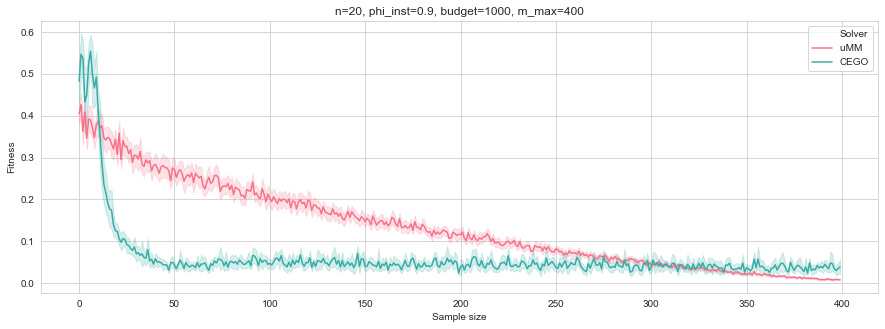

In [5]:
sns.set_style("whitegrid")
color_variable = 'Solver'
y_variables = ['Fitness']#,'Distance'

for phi_i in df.phi_instance.drop_duplicates().values:
  for n in [20]:#df.n.drop_duplicates().values:
    for budget in [1000]:# df.budgetGA.drop_duplicates().values:
      for y_variable in y_variables:
        for m_max in [200,400]:
          plt.figure(figsize=(15,5))
          aux = df[(df.phi_instance==phi_i) & (df.n==n) & (df.budget==budget) & (df.m_max==m_max)] #& (df.rep==0)
          palette = sns.color_palette("husl", len(aux[color_variable].drop_duplicates()))

          g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
          namestr = 'n='+str(n)+', phi_inst='+str(phi_i)+', budget='+str(budget)+', m_max='+str(m_max)
          g.set_title(namestr)
          plt.savefig("img/"+y_variable+"_"+namestr+".jpg")
          plt.show()
       

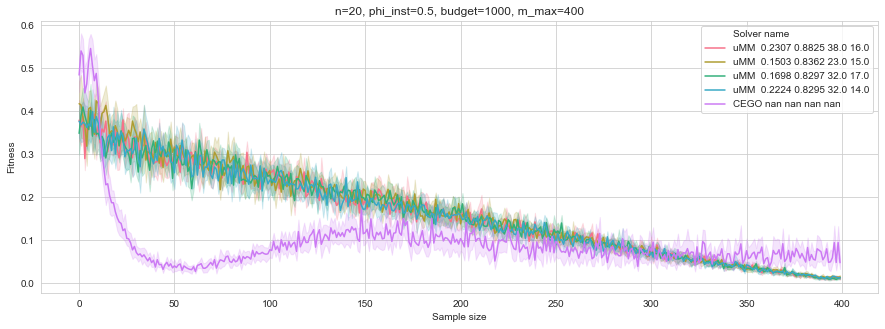

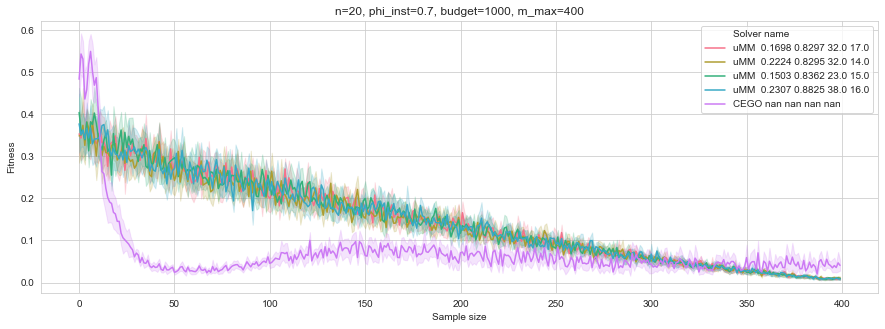

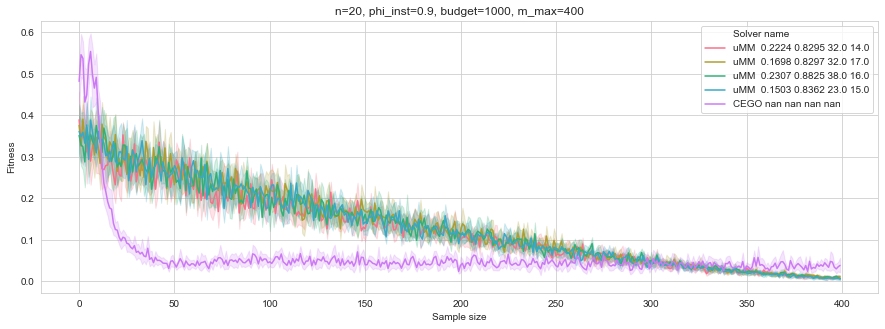

In [39]:
df['Solver name'] = df.Solver+' '+df.ratio_samples_learn.astype(str)+' '+df.weight_mass_learn.astype(str)+' '+df.m_ini.astype(str)+' '+df.budgetMM.astype(str)

sns.set_style("whitegrid")
color_variable = 'Solver name'
y_variables = ['Fitness']#,'Distance'

for phi_i in df.phi_instance.drop_duplicates().values:
  for n in [20]:#df.n.drop_duplicates().values:
    for budget in [1000]:# df.budgetGA.drop_duplicates().values:
      for y_variable in y_variables:
        for m_max in [400]:
          plt.figure(figsize=(15,5))
          aux = df[(df.phi_instance==phi_i) & (df.n==n) & (df.budgetGA==budget) & (df.m_max==m_max)] #& (df.rep==0)
          palette = sns.color_palette("husl", len(aux[color_variable].drop_duplicates()))

          g = sns.lineplot(x='Sample size',y=y_variable,hue=color_variable,data=aux, palette=palette)
          namestr = 'n='+str(n)+', phi_inst='+str(phi_i)+', budget='+str(budget)+', m_max='+str(m_max)
          g.set_title(namestr)
          plt.savefig("img/"+y_variable+"_"+namestr+".jpg")
          plt.show()
       
      


## Create synthetic instance

In [ ]:
import pickle
from lop import LOP
for rep in range(10):
  np.random.seed(rep)
  m_inst = 200
  instance = LOP.generate_synthetic(n, m_inst, phi_instance)
  file_pi = open("instances/LOPsynt_"+str(rep)+".pkl", 'wb') 
  pickle.dump(instance, file_pi)
  file_pi.close()

# Count the experiments in which CEGO/uMM wins

In [60]:
#mins = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
#mins.loc[mins.Solver!='CEGO','Solver']='uMM'
mins = df.copy()
mins = mins.groupby(['Solver','n','phi_instance','m_max','rep']).min()['Fitness'].copy()
mins = mins.unstack('Solver')
mins = mins.dropna()
mins = mins.reset_index()
#print(mins)#,mins.columns[-1]=='uMM', mins[mins.columns[-1]])
mins['FTW'] = mins[mins.columns[-1]]<mins.CEGO
#mins.to_csv('kaka.csv')
mins.groupby(['m_max','n','phi_instance']).sum()

Solver                  rep      CEGO      uMM    FTW
m_max n  phi_instance                                
400   20 0.5           45.0  0.064107  0.020508   8.0
         0.7           45.0  0.048079  0.015087  10.0
         0.9           45.0  0.025278 -0.008213  10.0

In [61]:
mins = df.copy()
mins = mins.groupby(['Solver name','n','phi_instance','m_max','rep']).min()['Fitness'].copy()
mins = mins.unstack('Solver name')
mins = mins.dropna()
mins.rank(axis=1)#.mean()


Solver name                CEGO nan nan nan nan  uMM  0.1503 0.8362 23.0 15.0  \
n  phi_instance m_max rep                                                       
20 0.5          400   0.0                   4.0                           5.0   
                      1.0                   3.0                           4.0   
                      2.0                   3.0                           5.0   
                      3.0                   4.0                           2.0   
                      4.0                   5.0                           3.0   
                      5.0                   4.0                           1.0   
                      6.0                   1.0                           2.0   
                      7.0                   4.0                           5.0   
                      8.0                   1.0                           4.0   
                      9.0                   5.0                           4.0   
   0.7          400   0.0                   2.0                           3.0   
                      1.0                   5.0                           3.0   
                      2.0                   4.0                           2.0   
                      3.0                   2.0                           4.0   
                      4.0                   2.0                           4.0   
                      5.0                   4.0                           1.0   
                      6.0                   4.0                           1.0   
                      7.0                   4.0                           3.0   
                      8.0                   3.0                           5.0   
                      9.0                   3.0                           5.0   
   0.9          400   0.0                   4.0                           1.0   
                      1.0                   5.0                           3.0   
                      2.0                   4.0                           5.0   
                      3.0                   3.0                           1.0   
                      4.0                   2.0                           1.0   
                      5.0                   4.0                           2.0   
                      6.0                   4.0                           2.0   
                      7.0                   4.0                           2.0   
                      8.0                   4.0                           1.0   
                      9.0                   2.0                           4.0   

Solver name                uMM  0.1698 0.8297 32.0 17.0  \
n  phi_instance m_max rep                                 
20 0.5          400   0.0                           1.0   
                      1.0                           2.0   
                      2.0                           2.0   
                      3.0                           1.0   
                      4.0                           1.0   
                      5.0                           2.0   
                      6.0                           4.0   
                      7.0                           3.0   
                      8.0                           2.0   
                      9.0                           1.0   
   0.7          400   0.0                           1.0   
                      1.0                           2.0   
                      2.0                           5.0   
                      3.0                           3.0   
                      4.0                           3.0   
                      5.0                           3.0   
                      6.0                           2.5   
                      7.0                           5.0   
                      8.0                           1.0   
                      9.0                           2.0   
   0.9          400   0.0                           5.0   
                      1.0                         

# Running times

In [22]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
aux = df[['Solver','run_time','n','budget']].drop_duplicates().copy()
aux.loc[aux.Solver.str.contains("uMM"),'Solver'] = "uMM"
aux.groupby(['Solver','n','budget']).mean()/3600

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


run_time
Solver n  budget           
CEGO   10 100      1.221154
          1000     7.235045
       20 100      3.226493
          1000    18.932458
       30 1000    57.898609
uMM    20 1000     0.058105

In [4]:
190/24


7.916666666666667

# Effect of increasing budget in GA

It *does* affect for $n=20$

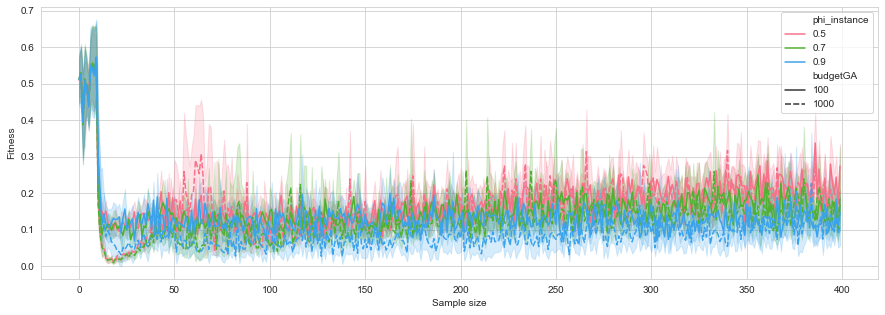

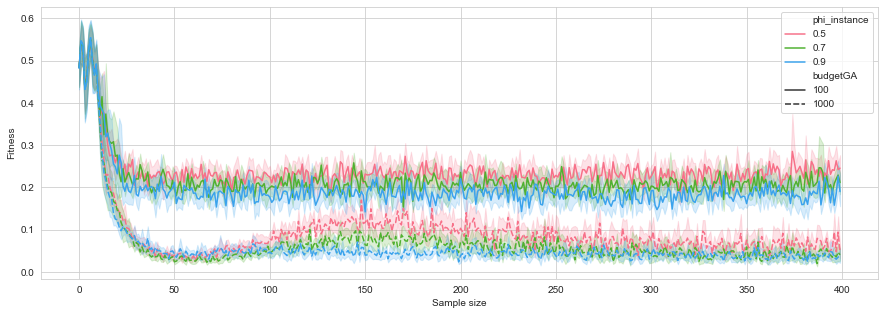

In [87]:
aux = df[df.Solver=='CEGO']
#aux = aux.groupby(['phi_instance','budgetGA','Sample size'])['Fitness'].mean().reset_index()##.plot()
aux##[aux.budgetGA==100]g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
palette = sns.color_palette("husl", 3)
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==10], palette=palette)#ci=None, 
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==20], palette=palette)#ci=None, 

# References
- http://www.spotseven.de/wp-content/papercite-data/pdf/zaef14c.pdf
- https://dl.acm.org/doi/pdf/10.1145/2576768.2598282  
- https://pubsonline.informs.org/doi/10.1287/ijoc.1120.0506
- https://link.springer.com/article/10.1007/s11721-015-0106-x
- http://iridia.ulb.ac.be/supp/IridiaSupp2015-004/index.html#Scenarios
- instances LOLIB: http://grafo.etsii.urjc.es/optsicom/lolib/#instances
- bayesian opt tutorial: https://arxiv.org/pdf/1012.2599.pdf
- VEGO package: https://cran.r-project.org/web/packages/CEGO/CEGO.pdf
- A Bayesian Discrete Optimization Algorithm for Permutation Based Combinatorial Problems 

  
  falta encontrar donde habia uno con el LOP
  
# LOP instance generator
  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=k/(1-\phi^k).$$
  
Taking different values of $\phi$ we controll the uniformity of $M$:
  
  

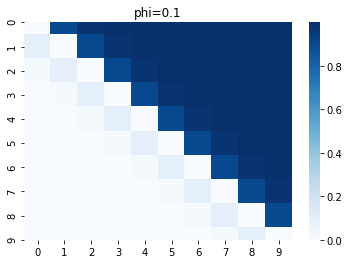

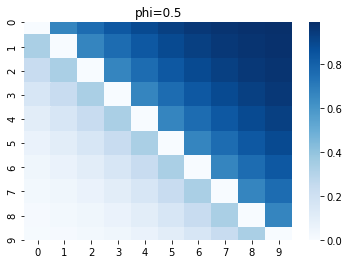

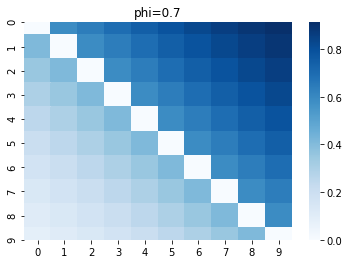

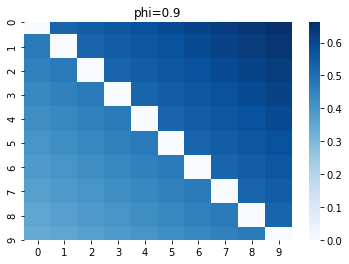

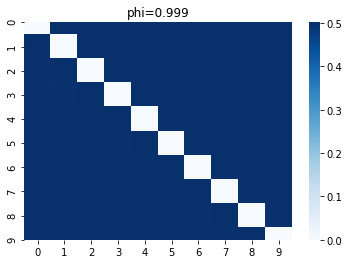

In [3]:
def h(k,phi):
  if (1-phi**k) == 0 : 
    return 0
  return k/(1-phi**k)
  #h(k,\phi)=k/(1-\phi^k)
def mij(i,j,phi):
  return h(j-i+1,phi) - h(j-i,phi)
      #h(j-i+1,\phi) - h(j-i,\phi)
n = 10
for phi in [0.1,0.5,0.7,0.9,0.999]:
  M = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      M[i,j] = mij(i,j,phi)
      M[j,i] = 1-M[i,j]
  g = sns.heatmap(M, cmap="Blues")
  g.set_title("phi="+str(phi))
  plt.show()

# Do similar permutations have similar fitness?
In this experiment we analyse the relation between similarity in Kendall distance and in fitness funtion evaluation in the LOP instances. The process is as follows:

do 100 times:

1. a,b = generate two u.a.r. permutations
3. $x = d(a,b)$
2. $y = |f(a) - f(b)|$
4. draw a point in $(x,y)$


We see that:
- close permutations have similar fitness
- distant permutations have high variance in fitness

Kriging assumptions:
- stationarity (yes)
- constant variogram (no)

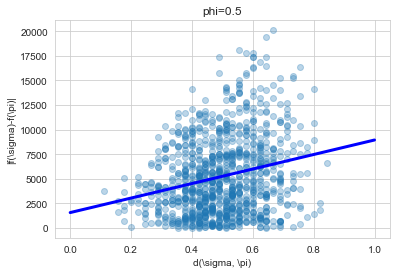

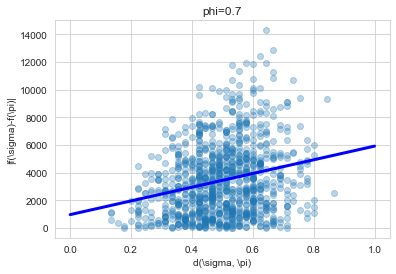

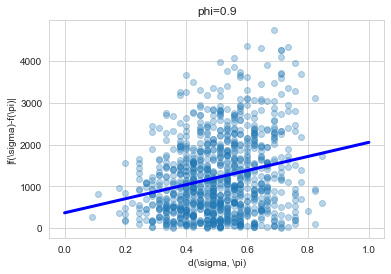

In [14]:
reload(cego_lop)
reload(cego)
reload(lop)

n = 10
for phi in [0.5,0.7,0.9]:
  instance = lop.synthetic_LOP(n,1000,phi)
  xs, ys = [],[]
  for reps in range(1000):
    a,b = np.random.permutation(range(n)),np.random.permutation(range(n))
    ys.append(abs(lop.get_fitness(a, instance) - lop.get_fitness(b, instance)))
    #xs.append(mk.kendallTau(np.argsort(a),np.argsort(b))) #similar
    xs.append(mk.kendallTau(a,b)/(n*(n-1)/2))
  plt.scatter(xs,ys,alpha=0.3)
  regr = linear_model.LinearRegression()
  regr.fit([[x] for x in xs], ys)
  pred = regr.predict([[x] for x in np.linspace(0,1)])
  plt.plot(np.linspace(0,1), pred, color='blue', linewidth=3)

  plt.ylabel(r'|f(\sigma)-f(\pi)|')
  plt.xlabel(r'd(\sigma, \pi)')
  plt.title("phi="+str(phi))
  plt.show()

# TODO
- meter más problemas: **PFSP**, TSP, ...
- comparar con otras alternativas: LS? 
- el símil con la optimización bayesiana no está claro, cómo se traslada aquí la función de utilidad?
- demostración de convergencia rápida 
- escribir draft para tener el modelo claro
- maximize (squarre) sum of distances for ini